In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from math import factorial

In [2]:
ven1QEFile = '../components/camera/detector/vendor1/ven1QE.dat'
ven1LossesFile = '../components/camera/detector/vendor1/ven1Losses.dat'
ven2QEFile = '../components/camera/detector/vendor2/ven2QE.dat'
ven2LossesFile = '../components/camera/detector/vendor2/ven2Losses.dat'
detectorFile = '../components/camera/detThroughput.dat'

In [3]:
ven1QE = np.loadtxt(ven1QEFile)
ven1Losses = np.loadtxt(ven1LossesFile)
ven2QE = np.loadtxt(ven2QEFile)
ven2Losses = np.loadtxt(ven2LossesFile)

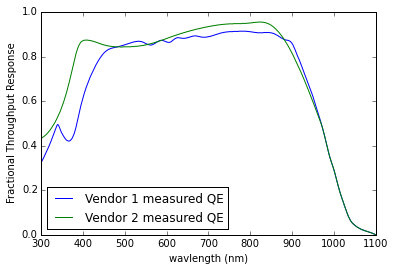

In [4]:
_ = plt.ylim([0., 1.002])
_ = plt.plot(ven1QE[:,0], ven1QE[:,1], label='Vendor 1 measured QE')
_ = plt.plot(ven2QE[:,0], ven2QE[:,1], label='Vendor 2 measured QE')
_ = plt.legend(loc='lower left')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [5]:
wavelen = np.arange(300, 1101, 1)
extrapolator = UnivariateSpline(ven1Losses[:,0], ven1Losses[:,1], k=1)
ven1DetLoss = extrapolator(wavelen)
extrapolator = UnivariateSpline(ven2Losses[:,0], ven2Losses[:,1], k=1)
ven2DetLoss = extrapolator(wavelen)

In [6]:
ven1DetQE = ven1QE[:,1] * ven1DetLoss
ven2DetQE = ven2QE[:,1] * ven2DetLoss

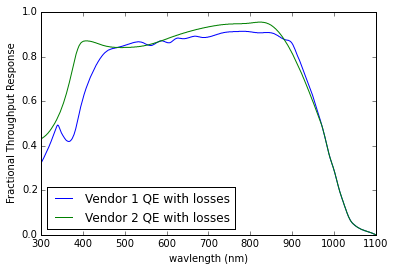

In [7]:
_ = plt.ylim([0., 1.002])
_ = plt.plot(wavelen, ven1DetQE, label='Vendor 1 QE with losses')
_ = plt.plot(wavelen, ven2DetQE, label='Vendor 2 QE with losses')
_ = plt.legend(loc='lower left')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [46]:
minDetQE = np.minimum(ven1DetQE, ven2DetQE)

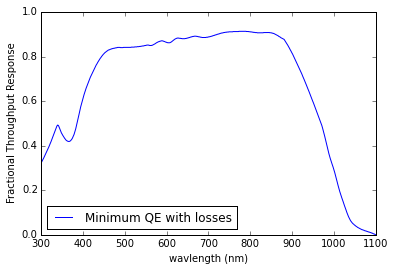

In [47]:
_ = plt.ylim([0., 1.002])
_ = plt.plot(wavelen, minDetQE, label='Minimum QE with losses')
_ = plt.legend(loc='lower left')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [48]:
np.savetxt(detectorFile, zip(wavelen, minDetQE))